In [4]:
import pandas as pd
df=pd.read_csv('sales_prediction.csv')
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
 x=df.drop(columns=["Item_Outlet_Sales"])
 
 y=df['Item_Outlet_Sales']
      

In [6]:
 from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape,x_test.shape      

((5966, 11), (2557, 11))

In [7]:
x_train.head(3)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
y_train.head(3)

1921     117.8466
655     1230.3984
2229    4933.5780
Name: Item_Outlet_Sales, dtype: float64

In [9]:
x_train_c =x_train.copy()

In [10]:
x_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [11]:
#isnull
x_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
#non object coulumns
num_data = x_train_c.select_dtypes(exclude=['object'])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [13]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [14]:
num_data.isnull().sum()

Item_Weight                  1023
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='Item_Weight'>

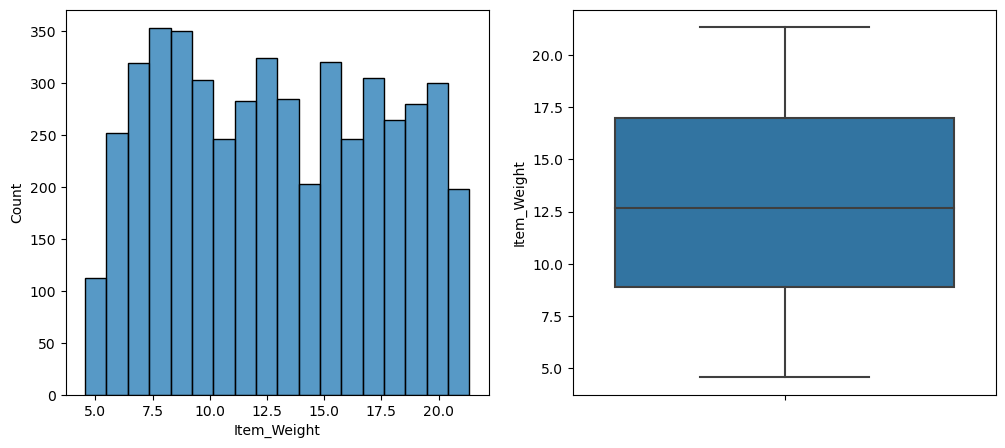

In [16]:
fig, ax=plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=x_train,x='Item_Weight',ax=ax[0])
sns.boxplot(data=x_train,y='Item_Weight',ax=ax[1])

In [17]:
def visualize(data_frame,col_name):
    fig, ax=plt.subplots(1,2,figsize=(12,5))

    sns.histplot(data=data_frame,x=col_name,ax=ax[0]);
    sns.boxplot(data=data_frame,y=col_name,ax=ax[1]);

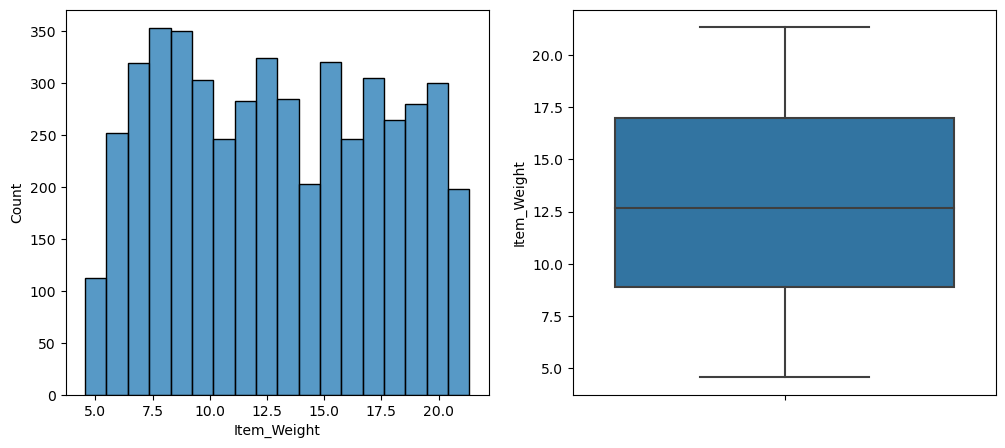

In [18]:
visualize(x_train_c,'Item_Weight')

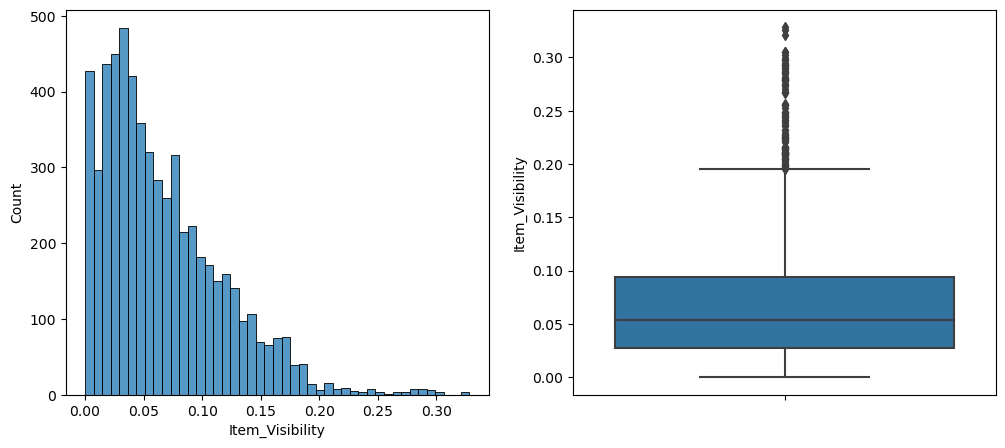

In [19]:
visualize(x_train_c,'Item_Visibility')

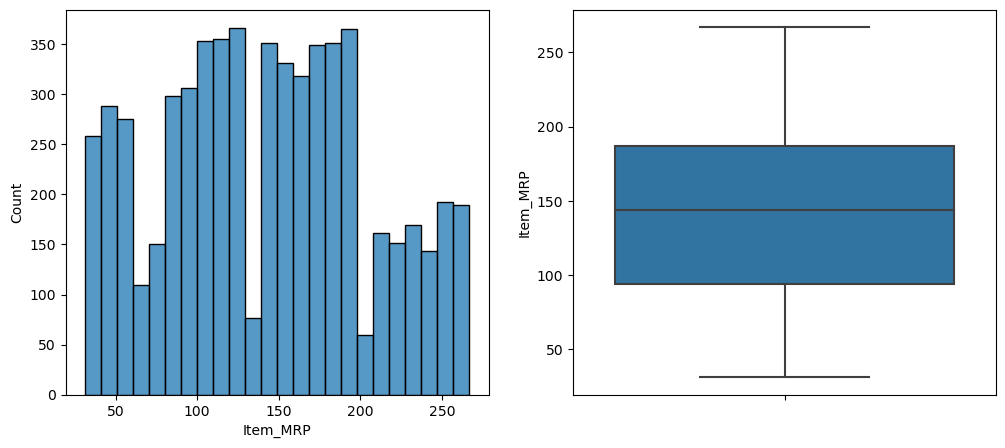

In [20]:
visualize(x_train_c,'Item_MRP')

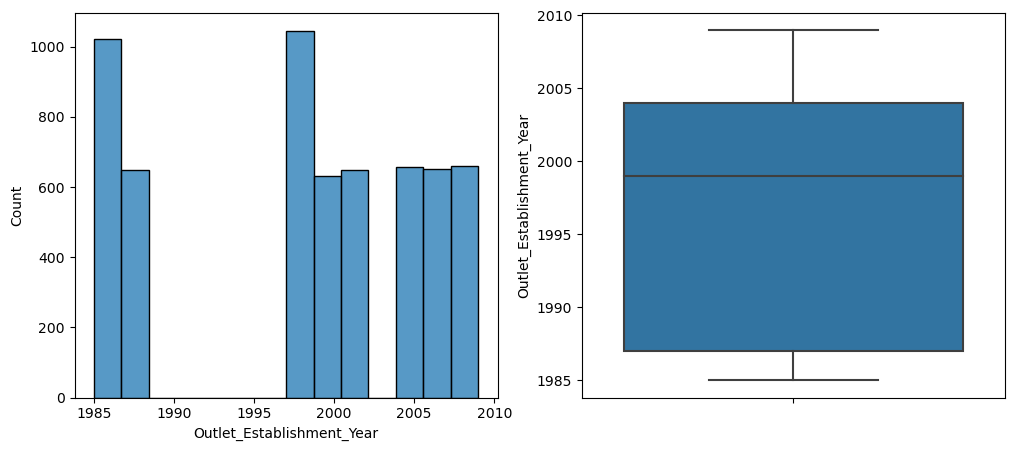

In [21]:
visualize(num_data,'Outlet_Establishment_Year')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

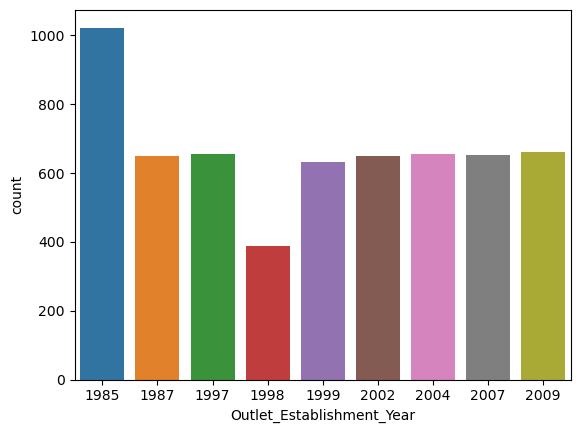

In [22]:
sns.countplot(data=x_train_c,x='Outlet_Establishment_Year')

In [23]:
cat_features =x_train_c.select_dtypes(include=['object'])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [24]:
cat_features.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


In [25]:
cat_features.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1690
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [26]:
cat_features['Item_Identifier'].value_counts()

NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: Item_Identifier, Length: 1543, dtype: int64

In [27]:
cat_features['Item_Fat_Content'].value_counts()

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

In [28]:
cat_features['Item_Type'].value_counts()

Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: Item_Type, dtype: int64

In [29]:
cat_features['Outlet_Identifier'].value_counts()

OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: Outlet_Identifier, dtype: int64

In [30]:
cat_features['Outlet_Size'].value_counts()

Medium    1960
Small     1667
High       649
Name: Outlet_Size, dtype: int64

In [31]:
cat_features['Outlet_Location_Type'].value_counts()

Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: Outlet_Location_Type, dtype: int64

In [32]:
cat_features["Outlet_Type"].value_counts()

Supermarket Type1    3893
Grocery Store         744
Supermarket Type3     668
Supermarket Type2     661
Name: Outlet_Type, dtype: int64

In [33]:
#Data Wraping and Data Featuring
# 1.create high level item types.
x_train_c['Item_Identifier'].str[:2].value_counts()

FD    4269
NC    1137
DR     560
Name: Item_Identifier, dtype: int64

In [34]:
#Step 1: Map Item ID's to Item Types

def create_item_type(data_frame):
    data_frame['Item_Type'] = data_frame['Item_Identifier'].str[:2]
    data_frame['Item_Type'] = data_frame['Item_Type'].map({ 'FD': 'Food', 'NC': 'Non_Consumables', 'DR': 'Drink'})
    return data_frame  # Added return statement to return the modified DataFrame



In [35]:
x_train_c = create_item_type(x_train_c)
x_train_c


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.720,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.750,Low Fat,0.014301,Non_Consumables,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.350,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.350,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5734,FDY08,9.395,Regular,0.286345,Food,139.1838,OUT010,1998,NaN,Tier 3,Grocery Store
5191,FDC41,15.600,Low Fat,0.117575,Food,75.6670,OUT017,2007,NaN,Tier 2,Supermarket Type1
5390,NCQ53,17.600,Low Fat,0.018944,Non_Consumables,237.3590,OUT045,2002,NaN,Tier 2,Supermarket Type1
860,FDL46,20.350,low fat,0.054363,Food,117.9466,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [36]:
#fill the missing values for item weigth
x_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [37]:
x_train_c[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [38]:
x_train_c[['Item_Type','Item_Weight']].drop_duplicates().sort_values(by=['Item_Type'])

,Item_Type,Item_Weight
2796,Drink,5.730
998,Drink,20.250
670,Drink,8.395
6091,Drink,13.500
3438,Drink,13.850
...,...,...
6624,Non_Consumables,12.600
6191,Non_Consumables,8.880
1911,Non_Consumables,19.850
135,Non_Consumables,7.235


In [39]:
#step2:fill in missing for item_weight
#logic
#1st step: Use mapping of item ID-Weight and fill in missing values
#2nd step: if completely new item
#i.e : item Id not in test \ live data use item type- median(weight) and fill missing values



In [40]:
item_id_weight_pivot = x_train_c.pivot_table(values='Item_Weight', index='Item_Identifier').reset_index()
item_id_weight_mapping = dict(zip(item_id_weight_pivot['Item_Identifier'], item_id_weight_pivot['Item_Weight']))
list(item_id_weight_mapping.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [41]:
item_type_weight_pivot = x_train_c.pivot_table(values='Item_Weight',index='Item_Type',aggfunc='median').reset_index()
item_type_weight_mapping = dict(zip(item_type_weight_pivot['Item_Type'],item_type_weight_pivot['Item_Weight']))
item_type_weight_mapping.items()

dict_items([('Drink', 11.8), ('Food', 12.8), ('Non_Consumables', 13.05)])

In [42]:
def impute_item_weight(data_frame):
    # 1st logic: item id-weight
    data_frame.loc[:,'Item_Weight'] = data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Identifier'].map(item_id_weight_mapping))
    # 2nd logic: item - weight if any missing
    data_frame.loc[:,'Item_Weight'] = data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Type'].map(item_type_weight_mapping))
    return data_frame

x_train_c = impute_item_weight(x_train_c)


In [43]:
x_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [44]:
#Fill in missing values for Outletsize

In [45]:
x_train_c.groupby(by=['Outlet_Type','Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [46]:
from scipy.stats import mode
result = x_train_c.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode().iloc[0]).reset_index(name='Mode_Outlet_Size')
print(result)

         Outlet_Type Mode_Outlet_Size
0      Grocery Store            Small
1  Supermarket Type1            Small
2  Supermarket Type2           Medium
3  Supermarket Type3           Medium


In [47]:
#step 3:Impute missing values for OutletSize
#logic
#1st step: Use missing of Outlet_Type=mode(Outlet_size) and fill in missing values

from scipy.stats import mode

outlet_type_size_pivot = x_train_c.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode().iloc[0]).reset_index(name='Mode_Outlet_Size')
outlet_type_size_mapping = dict(zip(outlet_type_size_pivot['Outlet_Type'], outlet_type_size_pivot['Mode_Outlet_Size']))
outlet_type_size_mapping

{'Grocery Store': 'Small',
 'Supermarket Type1': 'Small',
 'Supermarket Type2': 'Medium',
 'Supermarket Type3': 'Medium'}

In [48]:
def impute_outlet_size(data_frame):
    #1st logic outlet_type -mode(Outlet_size)
    data_frame.loc[:,'Outlet_Size'] = data_frame.loc[:,'Outlet_Size'].fillna(data_frame.loc[:,'Outlet_Type'].map({'Supermarket Type1': 'Small',
 'Supermarket Type2': 'Medium',
 'Supermarket Type3': 'Medium','Grocery Store' : 'Small'}))
    
    return data_frame


In [49]:
 x_train_c =impute_outlet_size(x_train_c)


In [50]:
x_train_c.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [51]:
#step 4: Make Item Fat Content categories consistent


def item_fat_content(data_frame):
    data_frame['Item_Fat_Content'] =data_frame['Item_Fat_Content'].replace({
        'Low Fat':'Low Fat','LF':'Low Fat','reg':'Regular','low fat':'Low Fat'
    })
    return data_frame


In [52]:
x_train_c = item_fat_content(x_train_c)
x_train_c['Item_Fat_Content'].value_counts()

Low Fat    3860
Regular    2106
Name: Item_Fat_Content, dtype: int64

In [53]:
#correct item fat content for non_counsumables

In [54]:
x_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low Fat              517
                 Regular               43
Food             Low Fat             2206
                 Regular             2063
Non_Consumables  Low Fat             1137
dtype: int64

In [55]:
x_train_c.loc[x_train_c['Item_Type'] == 'Non-Consumables','Item_Fat_Content']

Series([], Name: Item_Fat_Content, dtype: object)

In [56]:
# Step 5: Correct Item fat content for non-consumables
def correct_item_fat_content(data_frame):
    data_frame.loc[data_frame['Item_Type'] == 'Non_Consumables', 'Item_Fat_Content'] = 'Edible'
    return data_frame


In [57]:
x_train_c = correct_item_fat_content(x_train_c)
x_train_c.groupby(by=['Item_Type', 'Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low Fat              517
                 Regular               43
Food             Low Fat             2206
                 Regular             2063
Non_Consumables  Edible              1137
dtype: int64

In [58]:
x_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [59]:
#PREPARE DATASETS FOR ML

In [60]:
def prepare_dataset(data_frame):
    
    #step1: create Item Type
    data_frame = create_item_type(data_frame)
    
    #step2: fill in missing values for Item_Weight
    data_frame = impute_item_weight(data_frame)
    
    #step3:Impute missing values for Outlet_Size
    data_frame = impute_outlet_size(data_frame)
    
    #step4: Make Item Fat Content Categories consistent
    data_frame = item_fat_content(data_frame)
    
    #step5:Correct Item fat content for non-consumables
    data_frame = correct_item_fat_content(data_frame)
    
    return data_frame

In [61]:
x_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [62]:
x_train = prepare_dataset(x_train_c)
x_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [63]:
x_test=prepare_dataset(x_test)
x_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [64]:
# Handling Categorical Data

In [65]:
# All categorical columns - one hot encoded
cat_feats = x_train.select_dtypes(include=['object'])
cat_feats.head()


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Edible,Non_Consumables,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [66]:
from sklearn.preprocessing import OneHotEncoder

ohe =OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)


OneHotEncoder(handle_unknown='ignore')

In [67]:
ohe_feature_names =ohe.get_feature_names_out(input_features=cat_feats.columns)
ohe_feature_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [68]:
num_feats_train=x_train.select_dtypes(exclude=['object']).reset_index(drop=True)
num_feats_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.72,0.147904,116.6466,1998
1,19.75,0.014301,103.0332,1997
2,8.60,0.054221,129.1310,1985
3,19.35,0.118342,222.6088,2002
4,18.35,0.092150,184.8266,1987


In [69]:
cat_feats_train = x_train.select_dtypes(include=['object'])
x_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_names)
x_train_cat_ohe.head()


,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [70]:
x_train_final = pd.concat([num_feats_train,x_train_cat_ohe], axis=1)

x_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [71]:
final_columns=x_train_final.columns.values
final_columns

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [72]:
num_feats_test=x_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test = x_test.select_dtypes(include=['object'])
x_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns=ohe_feature_names)
x_test_final=pd.concat([num_feats_test,x_test_cat_ohe],axis=1)
x_test_final=x_test_final[final_columns]

x_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [73]:
#modeling


<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

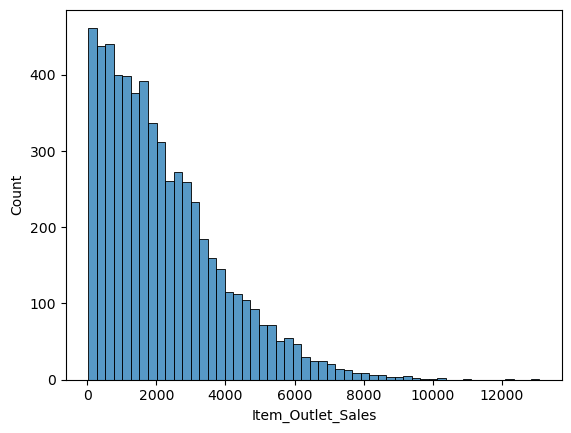

In [74]:
sns.histplot(y_train)

In [75]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [76]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor 
from sklearn.model_selection import cross_validate
import numpy as np
import xgboost as xgb
from lightgbm import LGBMRegressor


In [77]:
def train_and_eval_model(model, x_train, y_train, cv=5):
    cv_results = cross_validate(model, x_train, y_train, scoring=('r2','neg_root_mean_squared_error'), cv=cv,error_score='raise')
    print('Model:', model)
    r2_scores = cv_results['test_r2']
    print('R2 CV Scores:', r2_scores)
    print('R2 CV Scores mean/stdev:', np.mean(r2_scores), '/', np.std(r2_scores))
    
    rmse_scores = cv_results['test_neg_root_mean_squared_error']
    rmse_scores=[-1*score for score in rmse_scores]
    print('RMSE CV Scores:', rmse_scores)
    print('RMSE CV SCORES mean/stdev:', np.mean(rmse_scores), '/', np.std(rmse_scores))


In [ ]:
gb=GradientBoostingRegressor(random_state=42)
train_and_eval_model(model=gb,x_train=x_train_final,y_train=y_train)

In [ ]:
xgr=xgb.XGBRegressor(objective='reg:squarederror',random_state=42)
train_and_eval_model(model=xgr,x_train=x_train_final,y_train=y_train)

In [ ]:
lgbr = LGBMRegressor(random_state=42)
train_and_eval_model(model=lgbr, x_train=x_train_final, y_train=y_train)

In [ ]:
Exp:2
#All categorical columns-Native Handling

In [81]:
x_train_copy = x_train.copy().drop(columns='Item_Identifier')

cat_cols = x_train_copy.select_dtypes(include=['object']).columns.tolist()
num_cols = x_train_copy.select_dtypes(exclude=['object']).columns.tolist()

cat_cols, num_cols

x_train_copy[cat_cols] = x_train_copy[cat_cols].astype('category')
n_categorical_features = len(cat_cols)
n_numerical_features = len(num_cols)
x_train_copy = x_train_copy[cat_cols + num_cols]

from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

categorical_mask = [True] * n_categorical_features + [False] * n_numerical_features

ordinal_encoder = make_column_transformer(
    (OrdinalEncoder(), make_column_selector(dtype_include="category")),
    remainder="passthrough"
)

hgb = make_pipeline(
    ordinal_encoder,
    HistGradientBoostingRegressor(
        random_state=42, categorical_features=categorical_mask
    )
)

train_and_eval_model(model=hgb, x_train=x_train_copy, y_train=y_train)


Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000028850DEB290>)])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[True, True,
                                                                     True, True,
                                                                     True, True,
                                                                     False,
                                                                     False,
                                                                     False,
                                                                     False],
                  

In [87]:
# Item_Identifier-feature hashed,rest categorical-one hot encoded

In [98]:
from sklearn.feature_extraction import FeatureHasher

hash_vector_size = 50
fh = FeatureHasher(n_features=hash_vector_size, input_type='string')
hashed_data = fh.transform([[item] for item in x_train['Item_Identifier']])
hashed_df = pd.DataFrame(hashed_data.toarray(),
                         columns=['H' + str(i) for i in range(hash_vector_size)])

hashed_df.head()


,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H40,H41,H42,H43,H44,H45,H46,H47,H48,H49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
cat_feats =x_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)
ohe_feature_names=ohe.get_feature_names_out(input_features=cat_feats.columns)

In [100]:
num_feats_train =x_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_train=x_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
x_train_cat_ohe=pd.DataFrame(ohe.transform(cat_feats_train).toarray(),columns=ohe_feature_names)
x_train_final=pd.concat([num_feats_train,hashed_df,x_train_cat_ohe],axis=1)
x_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [113]:
xgr=xgb.XGBRegressor(objective='reg:squarederror',random_state=42)
train_and_eval_model(model=xgr,x_train=x_train_final,y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV Scores: [0.5366875  0.48584155 0.47719171 0.53119059 0.4537317 ]
R2 CV Scores mean/stdev: 0.49692861028766744 / 0.032040891993087996
RMSE CV Scores: [1146.8461358825907, 1218.011839311164, 1262.4894157229014, 1183.8748256970878, 1282.61788146

In [126]:
x_test.shape

(2557, 11)

In [127]:
hashed_test_df = pd.DataFrame(fh.transform(x_test['Item_Identifier'].apply(lambda x: [x])).toarray(),
                              columns=['H' + str(i) for i in range(hash_vector_size)])
print('Shape of hashed_test_df:', hashed_test_df.shape)



Shape of hashed_test_df: (2557, 50)


In [128]:
num_feats_test = x_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test = x_test.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])


In [129]:
x_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns=ohe_feature_names)
print('Shape of x_test_cat_ohe:', x_test_cat_ohe.shape)


Shape of x_test_cat_ohe: (2557, 26)


In [130]:
x_test_final = pd.concat([num_feats_test, hashed_test_df, x_test_cat_ohe], axis=1)
print('Shape of x_test_final:', x_test_final.shape)


Shape of x_test_final: (2557, 80)


In [131]:
from xgboost import XGBRegressor

xgr = XGBRegressor(objective='reg:squarederror', random_state=42)
xgr.fit(x_train_final, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [133]:
# Make predictions on the test data using the trained model
y_pred = xgr.predict(x_test_final)

# Import necessary metrics
from sklearn.metrics import r2_score, mean_squared_error

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation scores
print('R2 Score:', r2)
print('RMSE Score:', rmse)

R2 Score: 0.542336999238969
RMSE Score: 1132.2151309907754


In [134]:
print('Shape of x_test_final:', x_test_final.shape)
print('Shape of y_test:', y_test.shape)

Shape of x_test_final: (2557, 80)
Shape of y_test: (2557,)


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

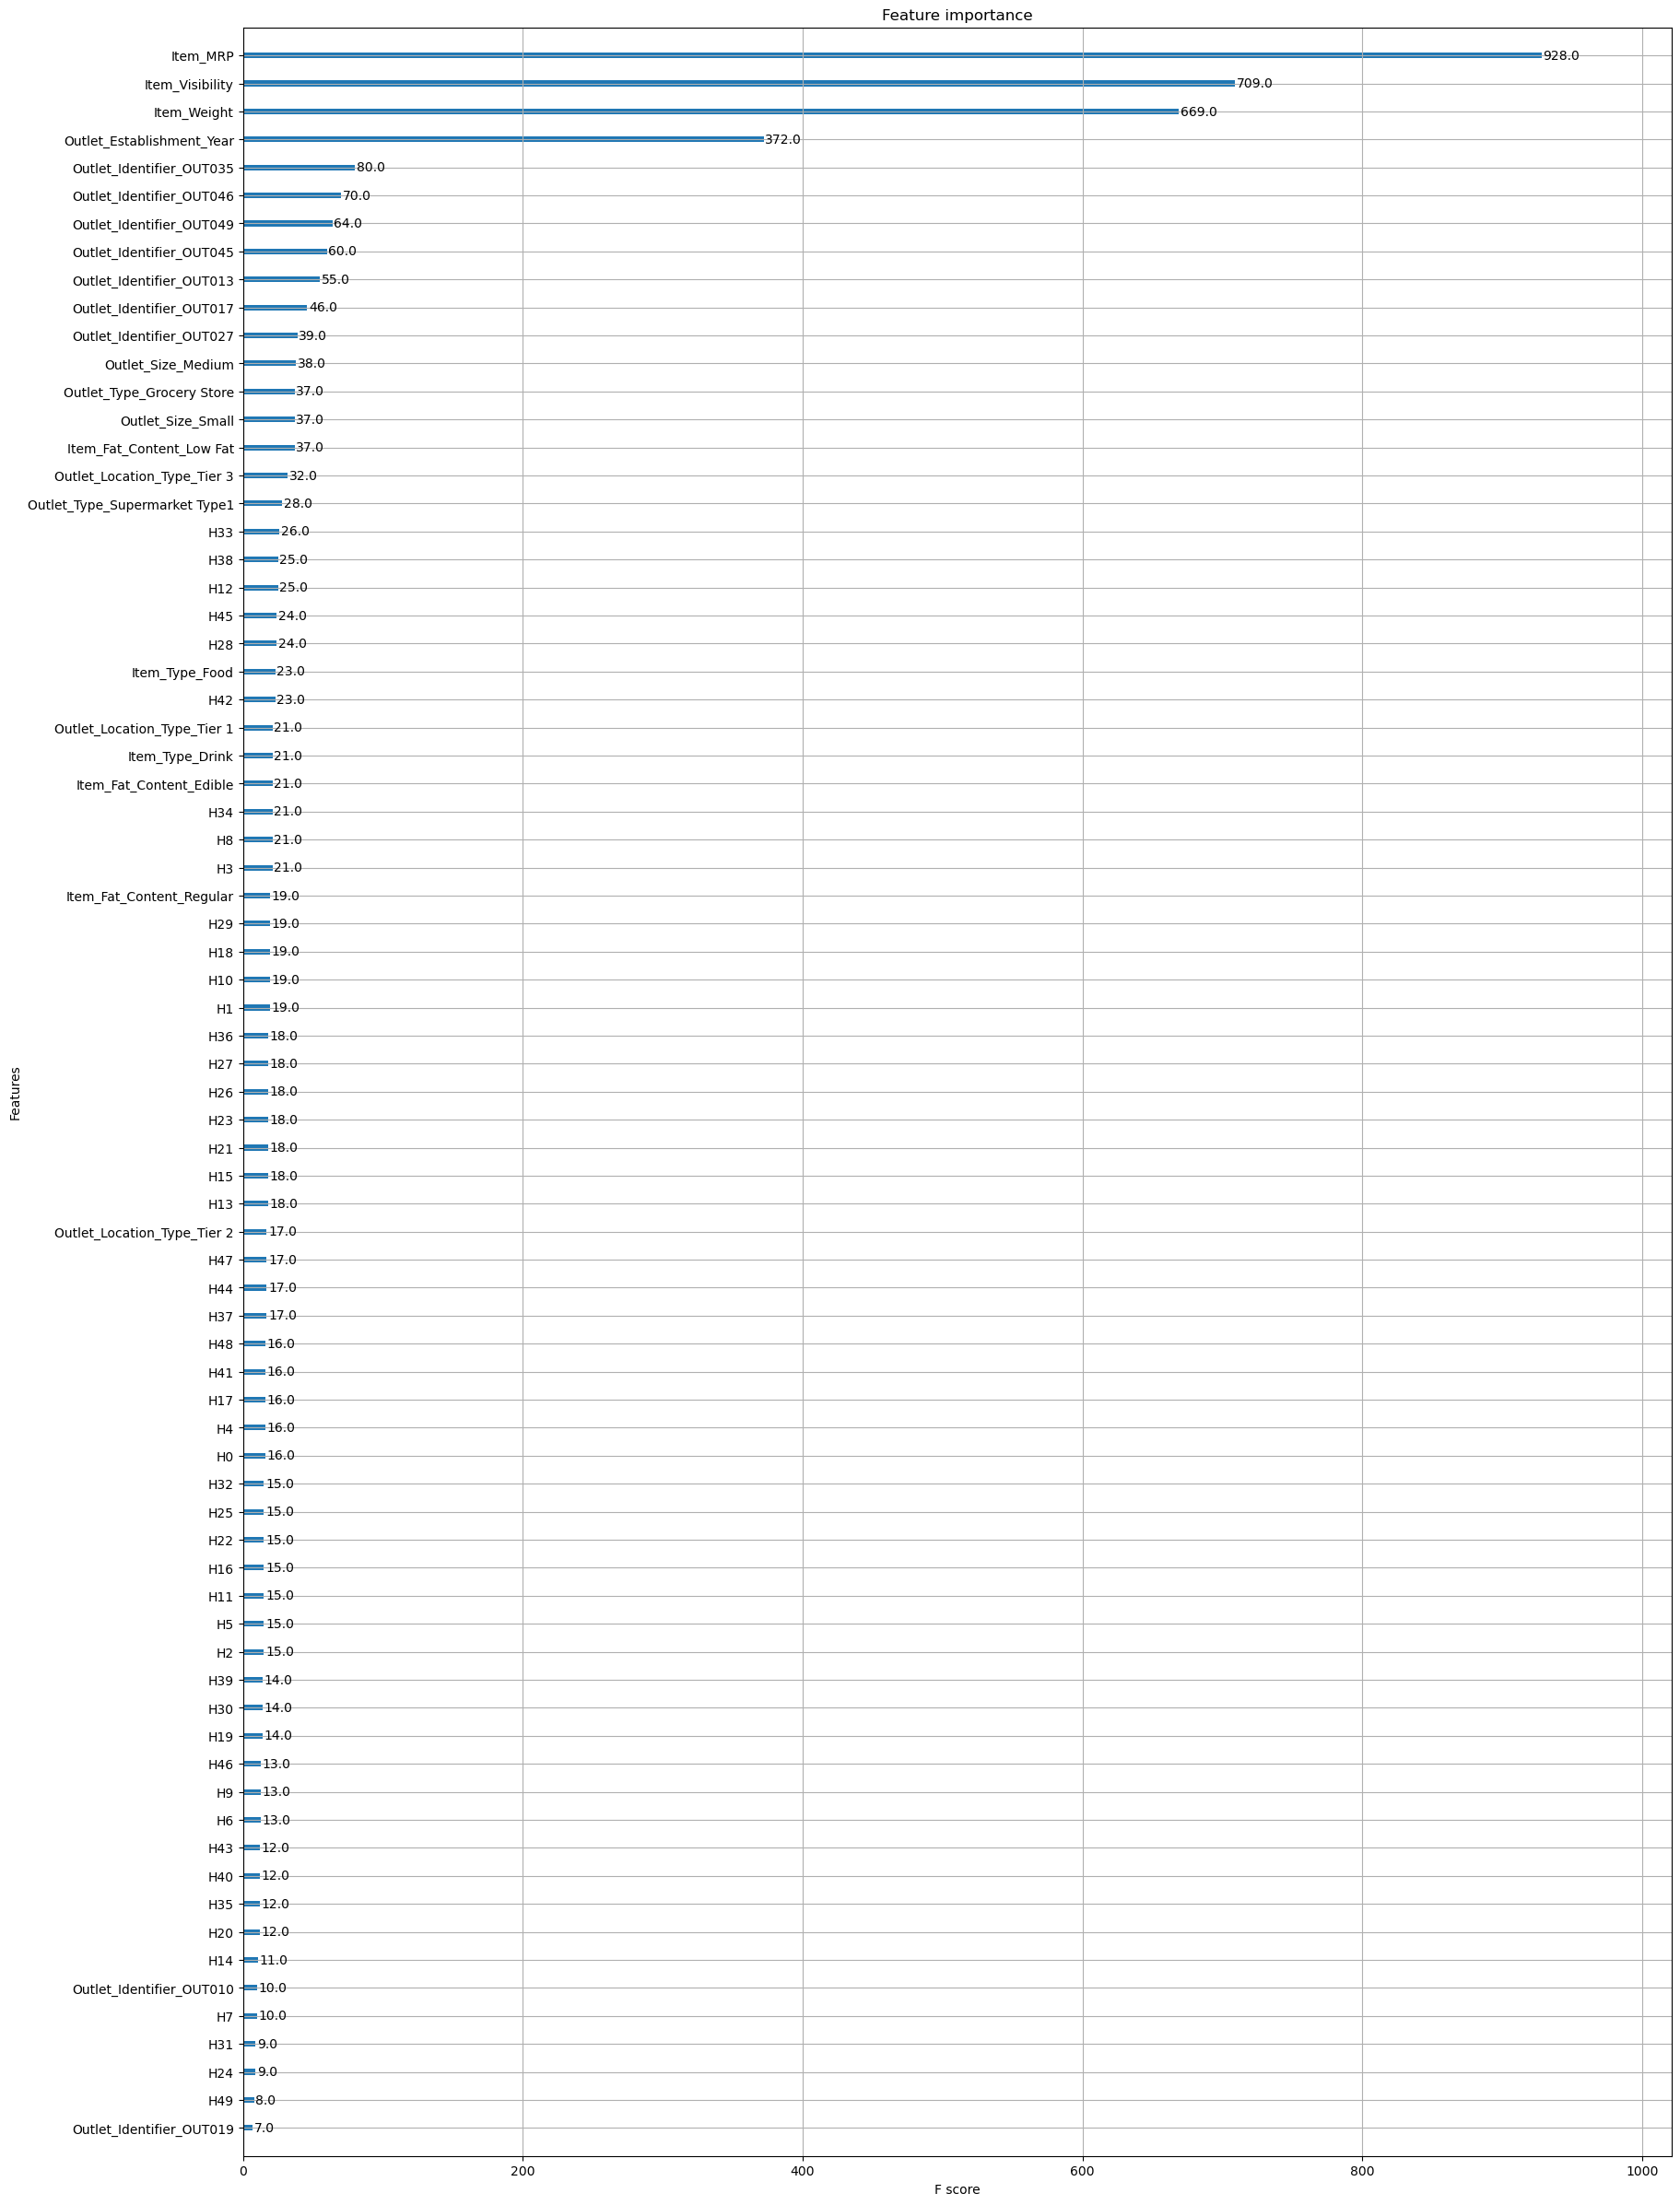

In [149]:
from xgboost import plot_importance

fig,ax= plt.subplots(1,1,figsize=(20,30))
plot_importance(xgr,ax=ax)